# Primera Red Neuronal desde 0, siguiendo el tutorial de Dot CSV
## https://youtu.be/W8AeOXa_FqU?si=S8PSYQXJMK0jb2sa

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

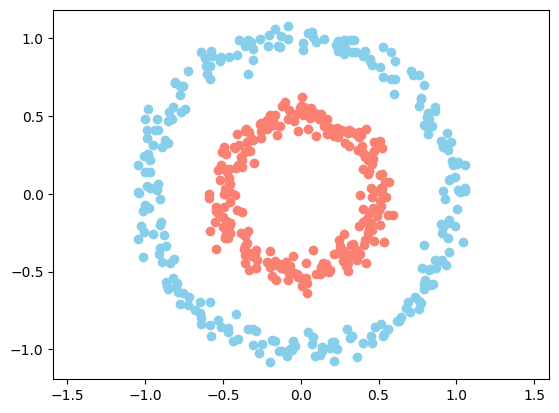

In [19]:
#Creacion del dataset

n = 500 #Numero registros
p = 2   #Numero caracteristicas por registro


#Factor es la distancia entre los ciruclos y noise la aleatoriedad
X,Y = make_circles(n_samples=n, factor=0.5, noise = 0.05) 

#X e Y deben tener la misma forma de matriz cuadrada, por lo que normalizamos Y

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c="skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c="salmon")
plt.axis("equal")
plt.show()



In [17]:
# Clase de la capa de la red
class neural_layer():
    def __init__(self,n_conn,n_neur,act_f):
        self.act_f = act_f
        self.b = np.random.rand(1,n_neur) * 2-1 #Bias
        self.W = np.random.rand(n_conn,n_neur) * 2-1 #Vector de Pesos 

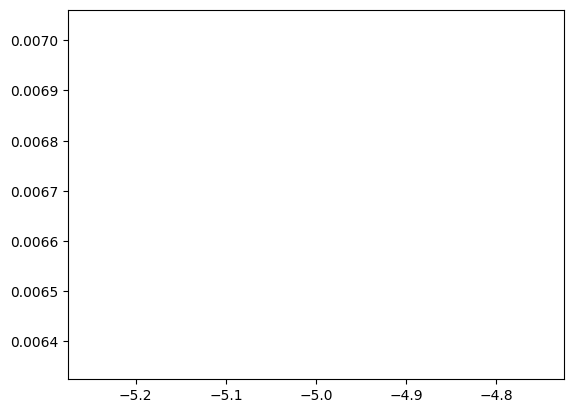

In [21]:
#Clase de Funciones de activacion , funciones anonimas con lambda

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
       lambda x: x * (1-x)) 
relu = lambda x: np.maximum(0,x) 

_x = np.linspace(-5,-5,100)

plt.plot(_x,sigm[0](_x))

In [ ]:
# Creacion de la Red neuronal


def create_nn(topology,act_f):
    nn = []
    for l,layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
    return nn



In [6]:
# Funcion de entrenamiento

# Numero de neuronas por capa, la ultima es 1 por que solo decide entre una clase u otra
topology = [p,4,8,1] 

neural_net = create_nn(topology,sigm)

l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr) ** 2),
lambda Yp,Yr: (Yr-Yp)) #Error cuadratico medio y su derivada

def train(neural_net,X,Y,l2_cost,lr=0.5,train = True):
    # 1 - Forward pass

    out = [(None,X)]

    for l,layer in enumerate(neural_net):
     z = out[-1][1] @ neural_net[l].W + neural_net[l].b #Suma ponderada de la capa l
     a = neural_net[l].act_f[0](z) #Aplicar Funcion de activación

     out.append((z,a)) 

    if train:
      #2 - Backward propagation
      deltas = []

      for l in reversed(range(0,len(neural_net))):

        z = out[l+1][0]
        a = out[l+1][1]

        #Caso especial, ultima capa donde delta es la función de coste
        if l == len(neural_net)-1 :
            #Calcular delta ultima capa.
            deltas.insert(0,l2_cost[1](a,Y)* neural_net[l].act_f[1](a))
        else:
            #Calcular delta respecto a capa previa
            deltas.insert(0,deltas[0] @ _W.T * neural_net[l].act_f[1](a))

        _W = neural_net[l].W  #Valor auxiliar de calculo
        # 3- Gradient Descent u optimizador
        neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis = 0,keepdims=True) * lr
        neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr  

    return out[-1][1]

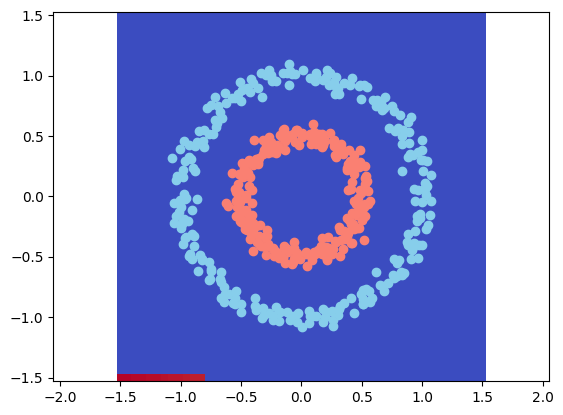

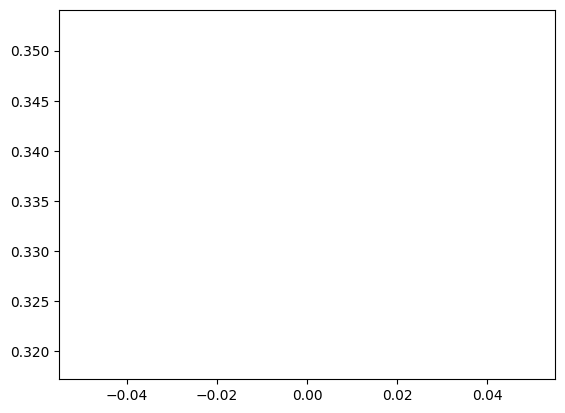

KeyboardInterrupt: 

In [7]:
#Entrenamiento
import time
from IPython.display import clear_output

neural_n = create_nn(topology,sigm)

loss = []

for i in range(1000):
    pY = train(neural_n,X,Y,l2_cost,lr = 0.001)

    if i % 25 == 0:
        loss.append(l2_cost[0](pY,Y))

        res = 50

        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))

        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1] = train(neural_n,np.array([x0,x1]), Y , l2_cost, train = False)[0][0]

                plt.pcolormesh(_x0,_x1,_Y,cmap = "coolwarm")
                plt.axis("equal")

                plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0,1],c = "skyblue")
                plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1],c = "salmon")

                clear_output(wait=True)
                plt.show()
                plt.plot(range(len(loss)),loss)
                plt.show()
                time.sleep(0.5)